In [1]:
import numpy
import jax
from jax import grad, jit, vmap
import jax.numpy as np
from jax import random
from jax.ops import index, index_add, index_update


In [2]:
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

In [8]:
import jax_nn_utils as jn

In [64]:
from importlib import reload
reload(jn)

<module 'jax_nn_utils' from '/home/bc/projects/deep_rl/jax/jax_nn_utils.py'>

# ReLu perceptron

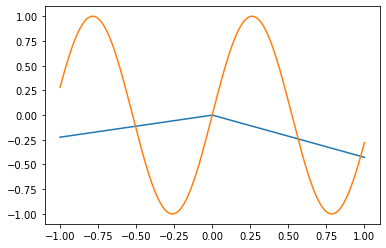

epoch 0, loss 38.686981201171875, LR 0.001

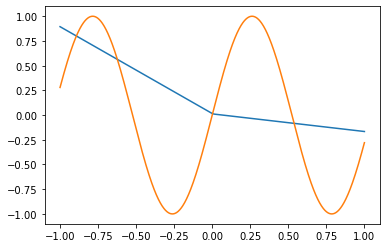

epoch 999, loss 5.869773864746094, LR 1e-05epoch 1000, loss 5.124385833740234, LR 1e-05

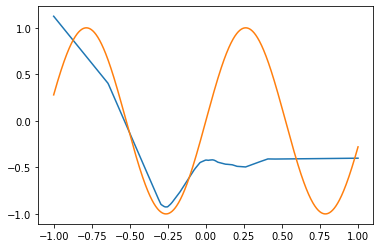

epoch 2000, loss 3.0046634674072266, LR 1e-05

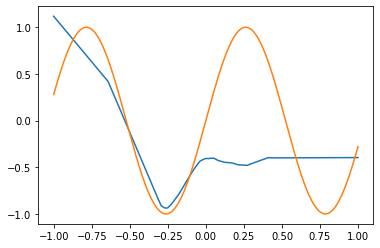

epoch 3000, loss 3.2607502937316895, LR 1e-05

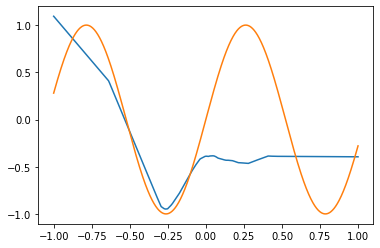

epoch 4000, loss 4.2892842292785645, LR 1e-05

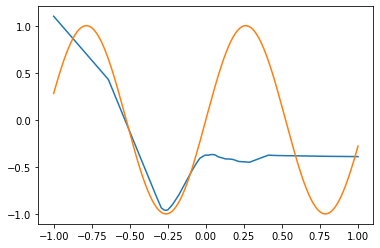

epoch 5000, loss 3.7615647315979004, LR 1e-05

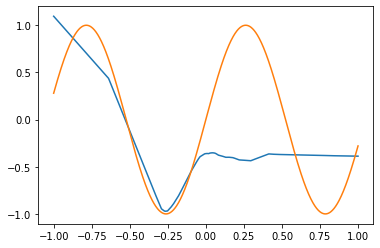

epoch 6000, loss 3.285942554473877, LR 1e-05

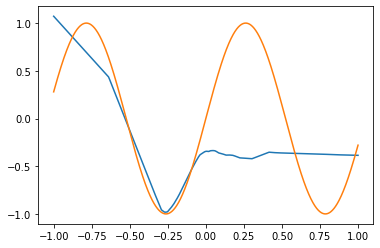

epoch 7000, loss 2.763978958129883, LR 1e-05

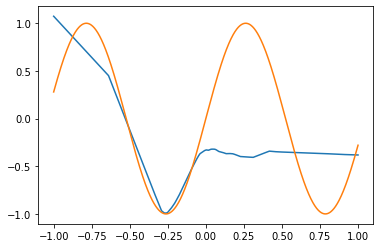

epoch 8000, loss 2.6926636695861816, LR 1e-05

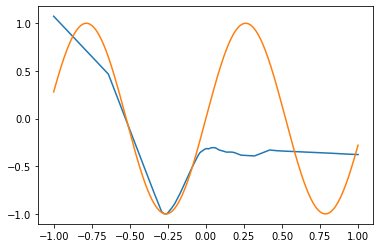

epoch 9000, loss 2.5082345008850098, LR 1e-05

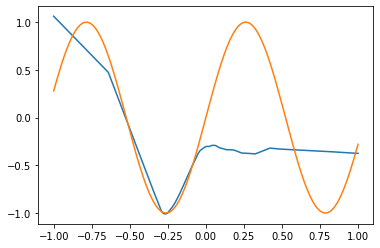

epoch 9999, loss 2.277493953704834, LR 1e-05

In [69]:
f = lambda x: numpy.sin(6*x)
# param_list, loss_list = jn.init_network_params_He([1,2,1])
# jn.plot_1d_model_fit(jn.predict, params, f)
param_list, loss_list = jn.fit_model(
    LR_0=0.001,
    LR_min=0.00001,
    decay=0.995,
    epoch_size=1000,
    num_epochs=10,
    batch_size=64,
    target_fn=f,
    target_fn_dim=1,
    layers=[2, 80, 40, 20, 1],
    params=None,
    plot_fn=jn.plot_1d_model_fit,
)

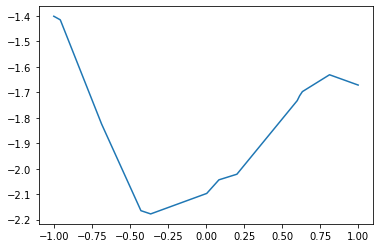

epoch 999, loss 13.377617835998535

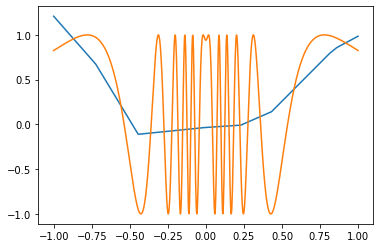

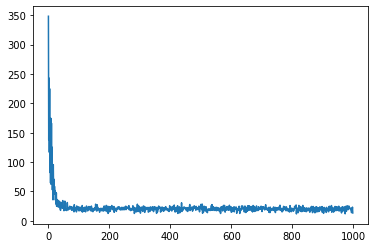

In [143]:
LR = .5
decay=.96
EPOCHS = 1000

batch_size = 64

loss_list = []
param_list = []

H = 50

params = init_network_params([1,H,1])
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss_3(params,data)
    loss_list.append(l)

    params = update(params,data,LR*decay**i)
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(loss_list)
plt.show()


In [11]:
# params = (
#     numpy.ones(H),
#     numpy.linspace(-1,1,H),
#     alternating_array(H,1,-1),
#     0.0
# )

def conditioned_layer_params(m, n):
    return (
        checkerboard(n,m),
        # numpy.ones((n,m)),
        numpy.linspace(-1,1,n).reshape(n,1)
    )

# Initialize all layers for a fully-connected neural network with sizes "sizes"
def init_network_params_conditioned(sizes):
    return [conditioned_layer_params(m, n) for m, n in zip(sizes[:-1], sizes[1:])]


# params = init_network_params_conditioned([1,31,1])

# plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
# plt.show()

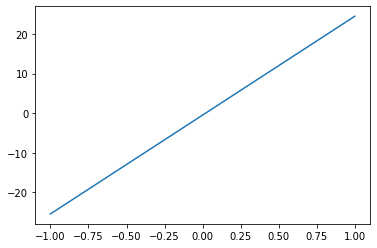

epoch 4999, loss 24.44121551513672

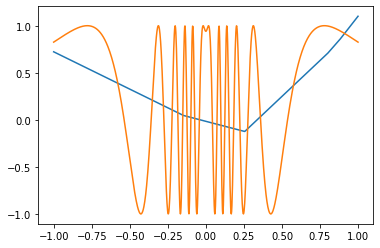

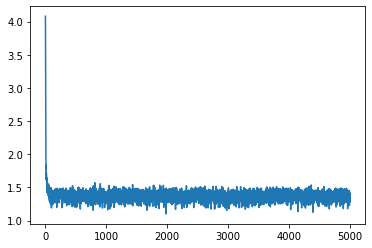

In [175]:
LR = .5
decay=.96
EPOCHS = 5000

batch_size = 100

loss_list = []
param_list = []

H=50

params = init_network_params_conditioned([1,H,1])

plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss_3(params,data)
    loss_list.append(l)

    params = update(params,data,LR*decay**i)
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()


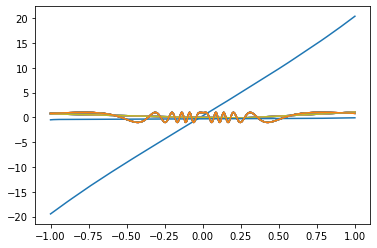

In [188]:
for i in range(0,EPOCHS,int(EPOCHS/10 -1)):
    params = param_list[-i]
    plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
    # plt.title(f"loss: {loss_list[-i]}")
    plt.plot(Xs,f(Xs))
plt.show()


# adding depth

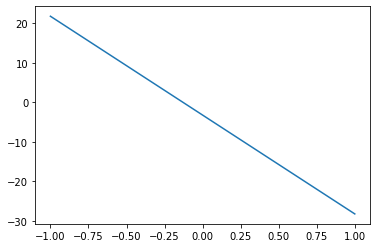

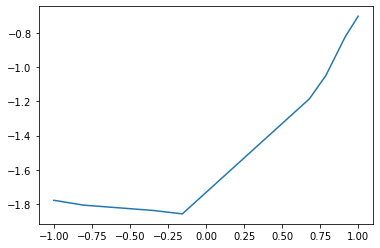

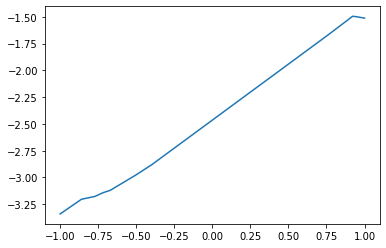

In [12]:

def conditioned_layer_params(m, n):
    return (
        checkerboard(n,m),
        # numpy.ones((n,m)),
        numpy.linspace(-1,1,n).reshape(n,1)
    )

# Initialize all layers for a fully-connected neural network with sizes "sizes"
def init_network_params_conditioned(sizes):
    return [conditioned_layer_params(m, n) for m, n in zip(sizes[:-1], sizes[1:])]

layers = [1,10,10,1]
params = init_network_params_conditioned(layers)

plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

params = init_network_params_unif(layers)

plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

params = init_network_params_unif(layers)

plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

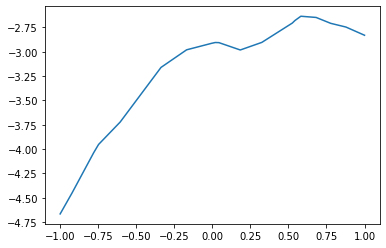

epoch 4999, loss 19.206649780273438

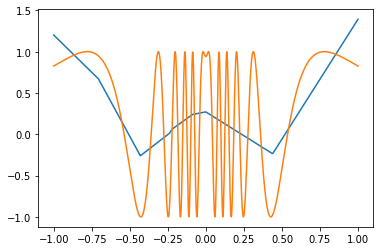

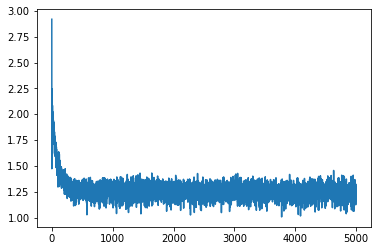

In [208]:
LR = .1
LR_min = .001
decay=.99
EPOCHS = 5000

batch_size = 100

loss_list = []
param_list = []

layers=[1,20,20,1]


params = init_network_params_unif(layers)

Xs = numpy.linspace(-1,1,1000)
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss_3(params,data)
    loss_list.append(l)

    params = update(params,data, max(LR*decay**i, LR_min))
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()


In [207]:
max(LR*.995**1000,.001)

0.0033269842894159828

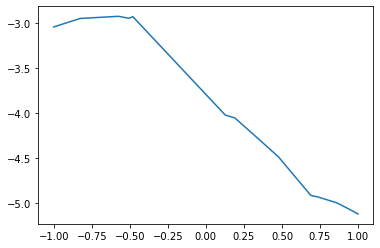

epoch 4999, loss 12.935783386230469

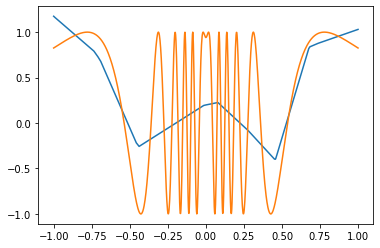

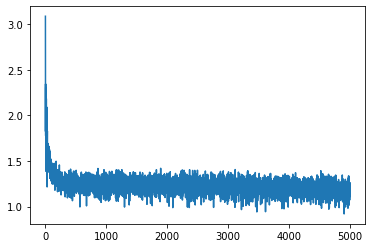

In [264]:
LR = .1
LR_min = .001
decay=.99
EPOCHS = 5000

batch_size = 100

loss_list = []
param_list = []

layers=[1,20,20,20,1]

params = init_network_params_unif(layers)

plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss_3(params,data)
    loss_list.append(l)

    params = update(params,data, max(LR*decay**i, LR_min))
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()


## He initialization

In [22]:

@jit
def loss(params, data):
    return np.sum(
        [(y - predict(params,x))**2 for x,y in data]
    )

# def loss(params, data):
#     return loss_on_data(data, predict, params)

@jit
def update(params, data, LR):
    grads = grad(loss)(params, data)
    return [
        (w - LR * normalize(dw), b - LR * normalize(db))
        for (w, b), (dw, db) in zip(params, grads)
    ]

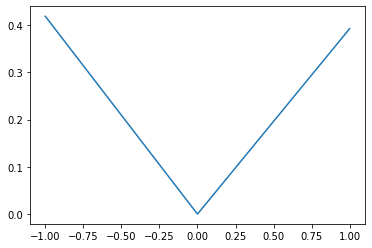

In [20]:

def init_network_params_He(sizes):
    return [(
        numpy.random.randn(n, m)*numpy.sqrt(2/m),
        numpy.zeros((n,1)) 
    ) for m, n in zip(sizes[:-1], sizes[1:])]

layers=[1,300,100,50,1]
params = init_network_params_He(layers)
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])

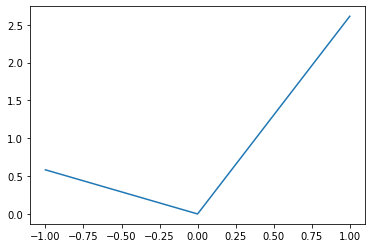

epoch 4998, loss 0.0008194219553843141epoch 4999, loss 0.0007340502343140543

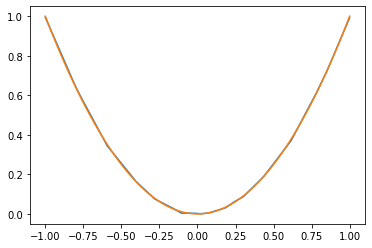

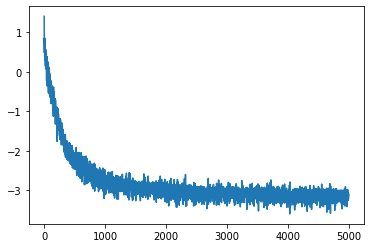

In [23]:
LR = .1
LR_min = .001
decay=.99
EPOCHS = 5000

batch_size = 100

loss_list = []
param_list = []

layers=[1,20,20,1]

########### trivial f
f = lambda x: x**2

params = init_network_params_He(layers)
Xs = numpy.linspace(-1,1,1000)
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss(params, data)
    loss_list.append(l)

    params = update(params, data, max(LR*decay**i, LR_min))
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()

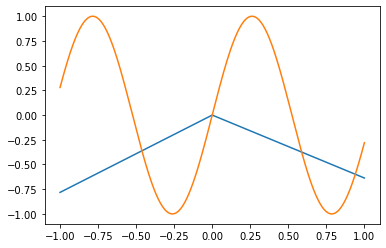

In [26]:
f = lambda x: np.sin(6*x)

params = init_network_params_He(layers)
Xs = numpy.linspace(-1,1,1000)
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()


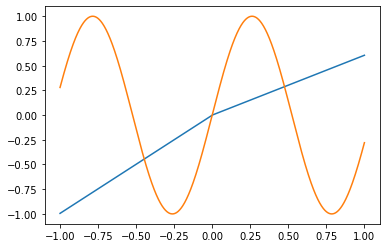

epoch 4999, loss 3.843438148498535

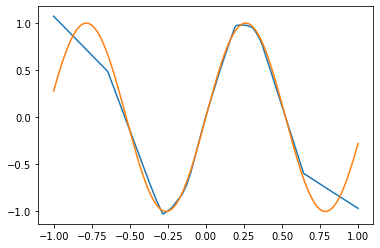

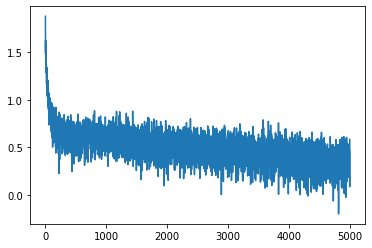

In [33]:
LR = .1
LR_min = .001
decay=.99
EPOCHS = 5000

batch_size = 10000

loss_list = []
param_list = []

layers=[1,40,20,1]

########### trivial f
f = lambda x: np.sin(6*x)

params = init_network_params_He(layers)
Xs = numpy.linspace(-1,1,1000)
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss(params, data)
    loss_list.append(l)

    params = update(params, data, max(LR*decay**i, LR_min))
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()

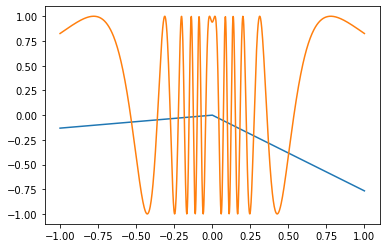

epoch 9999, loss 17.5640811920166

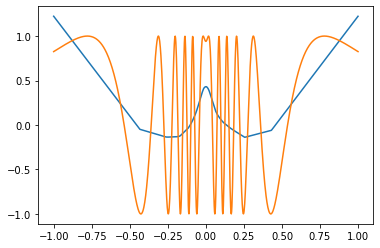

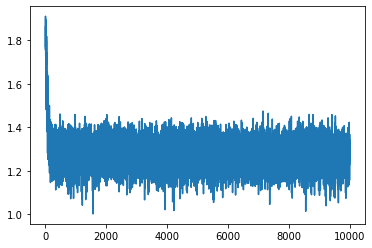

In [32]:
LR = .1
LR_min = .00001
decay=.99
EPOCHS = 10000

batch_size = 10000

loss_list = []
param_list = []

layers=[1,300,200,1]

########### "complicated" f
f = lambda x: np.sin(1/(x**2+.03))

params = init_network_params_He(layers)
Xs = numpy.linspace(-1,1,1000)
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss_3(params,data)
    loss_list.append(l)

    params = update(params,data, max(LR*decay**i, LR_min))
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[predict(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()

# Res net

In [292]:
def resnet_random_layer_params(m, n, scale=1e-2):
    return (
        scale * numpy.random.randn(n, m),
        scale * numpy.random.randn(n,1),
        scale * numpy.random.randn(m,n)
    )

def resnet_random_layer_params_unif(m, n, scale=1e-2):
    return (
        scale * 2 * numpy.random.rand(n, m) - 1,
        scale * 2 * numpy.random.rand(n,1) -1,
        scale * 2 * numpy.random.rand(m,n) -1
    )


def resnet_init_network_params(input_size, hidden_sizes, layer_fn, scale):
    return [layer_fn(input_size, m , scale) for m in hidden_sizes]

@jit
def res_net(params, x):
    # per-example predictions
    for w1, b, w2 in params[:-1]:
        x = np.dot(w2, relu(np.dot(w1, x) + b)) - x
    # w, b, _  = params[-1]
    # return np.dot(w, x) + b
    return x
  

@jit
def loss_rn(params, data,):
    return np.sum(
        [(y - res_net(params,x))**2 for x,y in data]
    )

@jit
def update_rn(params, data, LR,):
    grads = grad(loss_rn)(params, data)
    return [
        (
            w1 - LR * normalize(dw1),
            b - LR * normalize(db),
            w2 - LR * normalize(dw2)
        )
        for (w1, b, w2), (dw1, db, dw2) in zip(params, grads)
    ]

In [294]:
res_net(params,.5)

DeviceArray(0.5, dtype=float32)

In [297]:
# resnet_init_network_params(1,[2,2],resnet_random_layer_params_unif,1)
layers = [30,20]
params = resnet_init_network_params(1,layers,resnet_random_layer_params_unif,1)

plt.plot(Xs,[res_net(params,x) for x in Xs])
plt.show()
params


ValueError: x and y can be no greater than 2-D, but have shapes (977,) and (977, 1, 1)

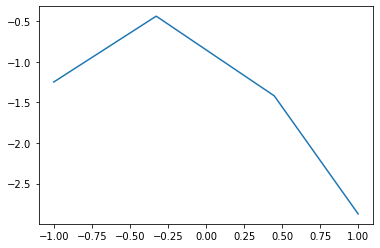

epoch 99, loss 496.34161376953125

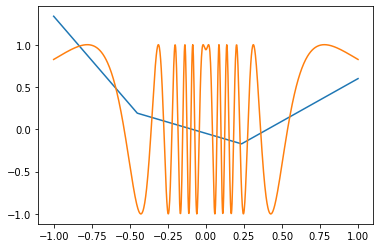

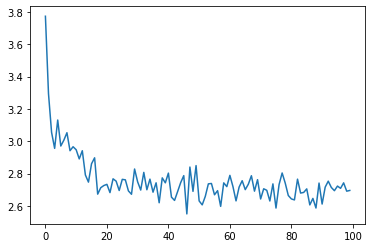

In [284]:
LR = .1
LR_min = .001
decay=.99
EPOCHS = 100

batch_size = 100

loss_list = []
param_list = []

layers=[20,20,20]

params = resnet_init_network_params(1,layers,resnet_random_layer_params_unif,1)

plt.plot(Xs,[res_net(params,x)[0,0] for x in Xs])
plt.show()

for i in range(EPOCHS):
    data = [(x,f(x)) for x in 2*numpy.random.rand(64)-1]
    l = loss_rn(params,data)
    loss_list.append(l)

    params = update_rn(params,data, max(LR*decay**i, LR_min))
    param_list.append(params)
    print(f"epoch {i}, loss {l}",end="\r")
    
plt.plot(Xs,[res_net(params,x)[0,0] for x in Xs])
plt.plot(Xs,f(Xs))
plt.show()
    
plt.plot(numpy.log10(loss_list))
plt.show()
